# Heart Disease Risk Analysis Data - Data Processing

### Process the data

- Load the data/2020/heart_2020_eda.csv
- Process the values
  - Convert Yes/No features to binary (1/0)
  - Cast all the numeric values to int to avoid float problems
- Process the features
  - Set the categorical features names
  - Set the numeric features names  
  - Set the target variable
- Feature importance analysis
 - Use statistical analysis to get the metrics like risk and ratio
 - Mutual Information score


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score


In [2]:
# open the csv file and read it into a pandas dataframe to understand the data
df_source = pd.read_csv('./data/2020/heart_2020_eda.csv', sep=',', quotechar='"')

# save the original set of data
df = df_source.copy()

df.head()

,heartdisease,bmi,smoking,alcoholdrinking,stroke,physicalhealth,mentalhealth,diffwalking,sex,agecategory,race,diabetic,physicalactivity,genhealth,sleeptime,asthma,kidneydisease,skincancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Connvert to binary data

In [3]:
# get a list of categorical features with Yes/No values 
features_binary = []
string_columns = df.select_dtypes(include=['object']).columns

for feature in string_columns:    

    if df[feature].str.lower().unique().tolist() in [['yes', 'no'], ['no', 'yes']]:
        features_binary.append(feature)

        # replace the values with 1 and 0
        df[feature] = df[feature].str.lower().replace({'yes': 1, 'no': 0})
        
# show the cols that have been converted to binary
print(features_binary)
print(df[features_binary].head())

['heartdisease', 'smoking', 'alcoholdrinking', 'stroke', 'diffwalking', 'physicalactivity', 'asthma', 'kidneydisease', 'skincancer']
   heartdisease  smoking  alcoholdrinking  stroke  diffwalking  \
0             0        1                0       0            0   
1             0        0                0       1            0   
2             0        1                0       0            0   
3             0        0                0       0            0   
4             0        0                0       0            1   

   physicalactivity  asthma  kidneydisease  skincancer  
0                 1       1              0           1  
1                 1       0              0           0  
2                 1       1              0           0  
3                 0       0              0           1  
4                 1       0              0           0  


In [4]:
# Cast all the numeric values to int
numeric_columns = df.select_dtypes(include=[np.number]).columns   
df[numeric_columns] = df[numeric_columns].astype(int)

# print each column and the data type
for col in df[numeric_columns]:
    print(col, df[col].dtype)

heartdisease int64
bmi int64
smoking int64
alcoholdrinking int64
stroke int64
physicalhealth int64
mentalhealth int64
diffwalking int64
physicalactivity int64
sleeptime int64
asthma int64
kidneydisease int64
skincancer int64


## Process the features

In [5]:
# Process the features

# set the target feature
target = 'heartdisease'

# Set a list of numeric features but exclude the target feature
num_features = list(df.select_dtypes(include=[np.number]).columns)

# get a list of categorical features 
cat_features = list(df.select_dtypes(include=['object']).columns)

# remove the target feature from the list of numeric features
if target in num_features:
    num_features.remove(target)

print('Categorical features',cat_features)
print('Numerical features',num_features)
print('Target feature',target)

# create a list of all features
all_features = cat_features + num_features  


Categorical features ['sex', 'agecategory', 'race', 'diabetic', 'genhealth']
Numerical features ['bmi', 'smoking', 'alcoholdrinking', 'stroke', 'physicalhealth', 'mentalhealth', 'diffwalking', 'physicalactivity', 'sleeptime', 'asthma', 'kidneydisease', 'skincancer']
Target feature heartdisease


## Feature importance analysis

Overall Rate 0.0903528803481408
           Feature Value  Percentage  Difference     Ratio      Risk
65             bmi    77    0.400000    0.309647  3.427086  4.427086
1           stroke     1    0.363810    0.273457  3.026542  4.026542
3        genhealth  Poor    0.341131    0.250778  2.775537  3.775537
68             bmi    80    0.333333    0.242980  2.689239  3.689239
18       sleeptime    19    0.333333    0.242980  2.689239  3.689239
71             bmi    83    0.333333    0.242980  2.689239  3.689239
21       sleeptime    22    0.333333    0.242980  2.689239  3.689239
1    kidneydisease     1    0.293308    0.202956  2.246254  3.246254
29  physicalhealth    29    0.289216    0.198863  2.200957  3.200957
23  physicalhealth    23    0.260870    0.170517  1.887230  2.887230
19  physicalhealth    19    0.257143    0.166790  1.845984  2.845984
19       sleeptime    20    0.250000    0.159647  1.766929  2.766929
53             bmi    65    0.250000    0.159647  1.766929  2.766929
28

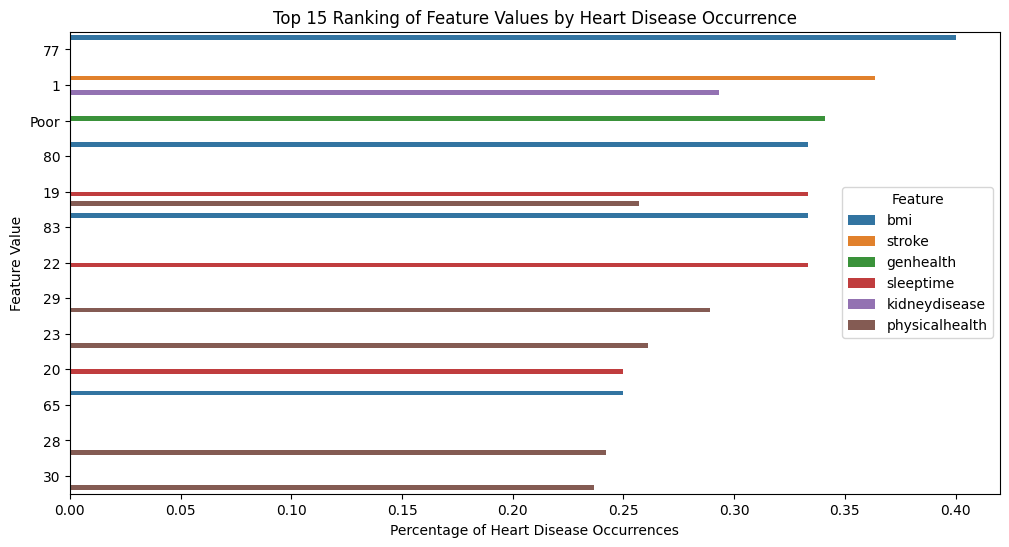

In [6]:

# Calculate the mean and count of heart disease occurrences per feature value
feature_importance = []

# Create a dataframe for the analysis
results = pd.DataFrame(columns=['Feature', 'Value', 'Percentage'])

for feature in all_features:    
    grouped = df.groupby(feature)[target].mean().reset_index()
    grouped.columns = ['Value', 'Percentage']
    grouped['Feature'] = feature
    results = pd.concat([results, grouped], axis=0)

# Sort the results by percentage in descending order and get the top 10
results = results.sort_values(by='Percentage', ascending=False).head(15)

# get the overall heart diease occurrence rate
overall_rate = df[target].mean()
print('Overall Rate',overall_rate)

# calculate the difference between the feature value percentage and the overall rate
results['Difference'] = results['Percentage'] - overall_rate

# calculate the ratio of the difference to the overall rate
results['Ratio'] = results['Difference'] / overall_rate

# calculate the risk of heart disease occurrence for each feature value
results['Risk'] = results['Percentage'] / overall_rate

# sort the results by ratio in descending order
results = results.sort_values(by='Risk', ascending=False)

print(results)

# Visualize the rankings (e.g., create a bar plot)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=results, x='Percentage', y='Value', hue='Feature')
plt.xlabel('Percentage of Heart Disease Occurrences')
plt.ylabel('Feature Value')
plt.title('Top 15 Ranking of Feature Values by Heart Disease Occurrence')
plt.show()

# Percentage of Heart Disease Occurrences: This value indicates the likelihood of a person 
# having heart disease given a specific feature value. It represents the proportion of 
# individuals with a particular feature value who also have heart disease.

## Mutual Information Score

agecategory    0.033523
genhealth      0.027151
diabetic       0.012960
sex            0.002771
race           0.001976
dtype: float64


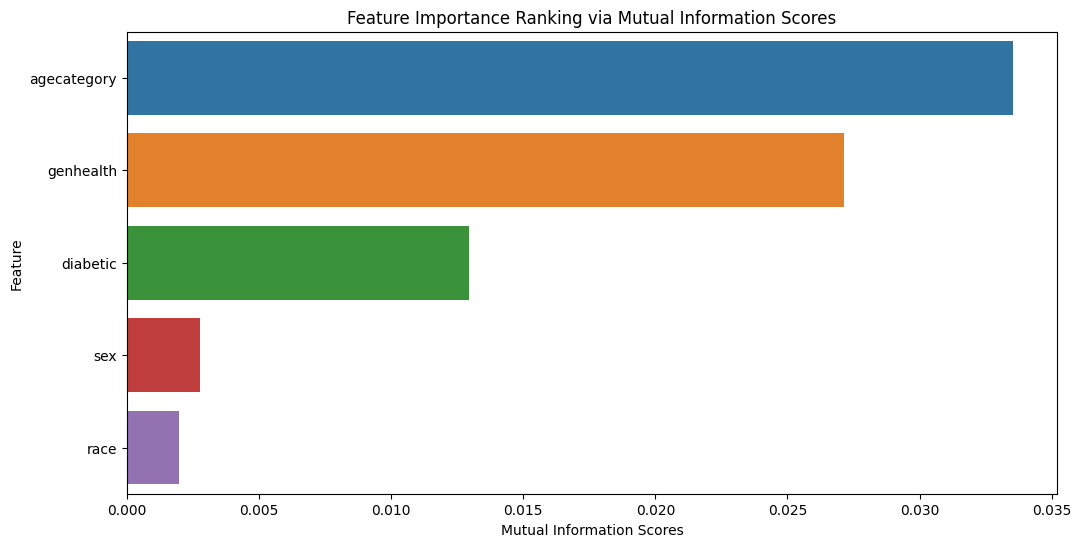

In [7]:
# mutual information score

# Compute mutual information scores for each feature
X = df[cat_features]
y = df[target]

def mutual_info_heart_disease_score(series):
    return mutual_info_score(series, y)

mi_scores = X.apply(mutual_info_heart_disease_score)
mi_ranking = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print(mi_ranking)
# Visualize the rankings
plt.figure(figsize=(12, 6))
sns.barplot(x=mi_ranking.values, y=mi_ranking.index)
plt.xlabel('Mutual Information Scores')
plt.ylabel('Feature')
plt.title('Feature Importance Ranking via Mutual Information Scores')
# plt.show()

# plt.savefig('./images/ozkary-ml-heart-disease-feature-importance.png')




In [8]:
# save the new dataset with all the transformations
df.to_csv('./data/2020/heart_2020_processed.csv', index=False)

## Create a balance dataset

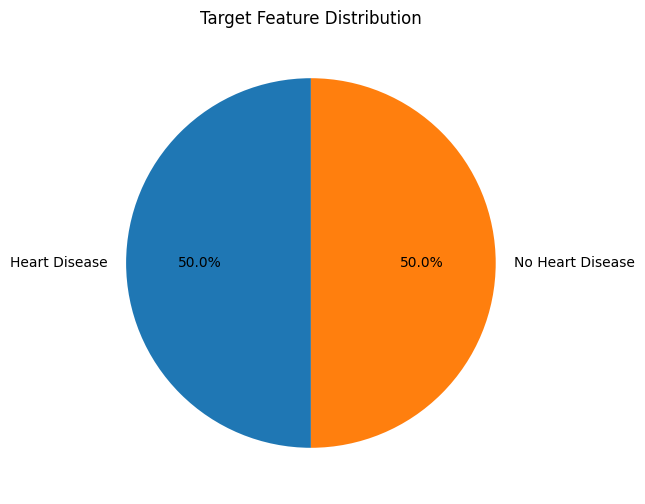

In [14]:
# solve the imbalance problem by downsampling the majority class
# get the number of rows with heart disease
num_hd = df[df[target] == 1].shape[0]

# get the indices of the rows without heart disease
idx = df[df[target] == 0].index

# randomly sample the indices with the same number of rows as heart disease
random_indices = np.random.choice(idx, num_hd, replace=False)

# get the indices of the rows with heart disease
idx_hd = df[df[target] == 1].index

# concatenate the indices of both classes
under_sample_indices = np.concatenate([idx_hd, random_indices])

# get the balanced dataframe
df_balanced = df.loc[under_sample_indices]

# show a pie diagram of the target feature distribution
plt.figure(figsize=(12, 6))
plt.pie(df_balanced[target].value_counts(), labels=['Heart Disease', 'No Heart Disease'], autopct='%1.1f%%', startangle=90)
plt.title('Target Feature Distribution')
plt.show()

# save the new dataset with all the transformations
df_balanced.to_csv('./data/2020/heart_2020_processed_balanced.csv', index=False)
